In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Sample reviews
reviews = [
    "I bought this product from Amazon and it was amazing!",
    "Got a great deal on Flipkart. Very satisfied.",
    "Meesho has a variety of products, but the delivery was late.",
    "Nykaa's beauty products are top-notch, love shopping from them!",
    "Amazon and Flipkart both have good services."
]

# List of product/company names to extract
product_names = ["Amazon", "Flipkart", "Meesho", "Nykaa"]

# Compile the regex pattern for matching product names
pattern = re.compile(r'\b(' + '|'.join(product_names) + r')\b', re.IGNORECASE)

# Function to extract product names from a review
def extract_product_names(review):
    return pattern.findall(review)

# Extract and print product names for each review
for review in reviews:
    extracted_names = extract_product_names(review)
    print(f"Review: {review}")
    print(f"Extracted Names: {extracted_names}")
    print()

Review: I bought this product from Amazon and it was amazing!
Extracted Names: ['Amazon']

Review: Got a great deal on Flipkart. Very satisfied.
Extracted Names: ['Flipkart']

Review: Meesho has a variety of products, but the delivery was late.
Extracted Names: ['Meesho']

Review: Nykaa's beauty products are top-notch, love shopping from them!
Extracted Names: ['Nykaa']

Review: Amazon and Flipkart both have good services.
Extracted Names: ['Amazon', 'Flipkart']



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#EXTRACTING PRODUCT NAMES FROM THE REVIEWS(SENTIMENTAL ANALYSIS)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_csv("/content/data.csv", on_bad_lines='skip')

df.head()


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46992 entries, 0 to 46991
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    46992 non-null  object 
 1   name                  33473 non-null  object 
 2   asins                 46990 non-null  object 
 3   brand                 46992 non-null  object 
 4   categories            46992 non-null  object 
 5   keys                  46991 non-null  object 
 6   manufacturer          46992 non-null  object 
 7   reviews.date          46939 non-null  object 
 8   reviews.dateAdded     29091 non-null  object 
 9   reviews.dateSeen      46991 non-null  object 
 10  reviews.didPurchase   3 non-null      object 
 11  reviews.doRecommend   46293 non-null  object 
 12  reviews.numHelpful    46389 non-null  float64
 13  reviews.rating        46955 non-null  float64
 14  reviews.sourceURLs    46990 non-null  object 
 15  reviews.text       

In [ ]:
data=df.copy()
data.info()

,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,46389.000000,46955.000000,0.0,0.0
mean,0.653883,4.606474,NaN,NaN
std,14.065568,0.720820,NaN,NaN
min,0.000000,1.000000,NaN,NaN
25%,0.000000,4.000000,NaN,NaN
50%,0.000000,5.000000,NaN,NaN
75%,0.000000,5.000000,NaN,NaN
max,814.000000,5.000000,NaN,NaN


<Axes: >

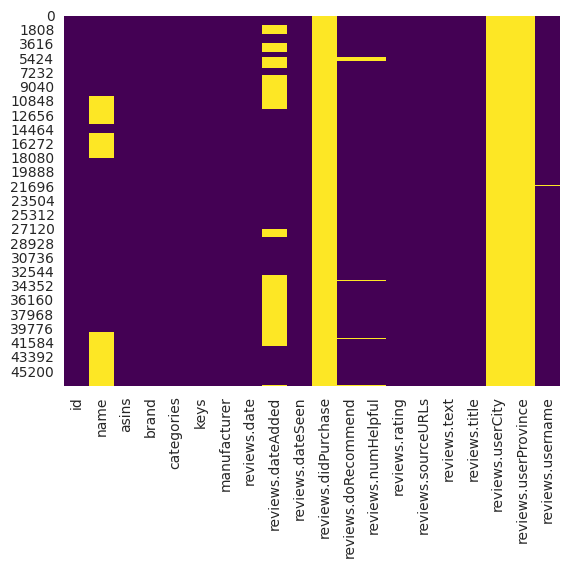

In [ ]:
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")

In [ ]:
df.drop(['reviews.id'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.numHelpful    34131 non-null  float64
 13  reviews.rating        34627 non-null  float64
 14  reviews.sourceURLs    34660 non-null  object 
 15  reviews.text       

In [ ]:
df.drop(['reviews.didPurchase'],inplace =True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46992 entries, 0 to 46991
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    46992 non-null  object 
 1   name                  33473 non-null  object 
 2   asins                 46990 non-null  object 
 3   brand                 46992 non-null  object 
 4   categories            46992 non-null  object 
 5   keys                  46991 non-null  object 
 6   manufacturer          46992 non-null  object 
 7   reviews.date          46939 non-null  object 
 8   reviews.dateAdded     29091 non-null  object 
 9   reviews.dateSeen      46991 non-null  object 
 10  reviews.doRecommend   46293 non-null  object 
 11  reviews.numHelpful    46389 non-null  float64
 12  reviews.rating        46955 non-null  float64
 13  reviews.sourceURLs    46990 non-null  object 
 14  reviews.text          46988 non-null  object 
 15  reviews.title      

In [ ]:
df.describe()

,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,46389.000000,46955.000000,0.0,0.0
mean,0.653883,4.606474,NaN,NaN
std,14.065568,0.720820,NaN,NaN
min,0.000000,1.000000,NaN,NaN
25%,0.000000,4.000000,NaN,NaN
50%,0.000000,5.000000,NaN,NaN
75%,0.000000,5.000000,NaN,NaN
max,814.000000,5.000000,NaN,NaN


In [ ]:
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46992 entries, 0 to 46991
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    46992 non-null  object 
 1   name                  33473 non-null  object 
 2   asins                 46990 non-null  object 
 3   brand                 46992 non-null  object 
 4   categories            46992 non-null  object 
 5   keys                  46991 non-null  object 
 6   manufacturer          46992 non-null  object 
 7   reviews.date          46939 non-null  object 
 8   reviews.dateAdded     29091 non-null  object 
 9   reviews.dateSeen      46991 non-null  object 
 10  reviews.doRecommend   46293 non-null  object 
 11  reviews.numHelpful    46389 non-null  float64
 12  reviews.rating        46955 non-null  float64
 13  reviews.sourceURLs    46990 non-null  object 
 14  reviews.text          46988 non-null  object 
 15  reviews.title      

In [ ]:
print(data['asins'].unique())
asins_unique=len(data['asins'].unique())
print("Number of Unique asins: "+str(asins_unique))


['B01AHB9CN2' 'B00VINDBJK' 'B005PB2T0S' 'B002Y27P3M' 'B01AHB9CYG'
 'B01AHB9C1E' 'B01J2G4VBG' 'B00ZV9PXP2' 'B0083Q04TA' 'B018Y229OU'
 'B00REQKWGA' 'B00IOYAM4I' 'B018T075DC' nan 'B00DU15MU4' 'B018Y225IA'
 'B005PB2T2Q' 'B018Y23MNM' 'B00OQVZDJM' 'B00IOY8XWQ' 'B00LO29KXQ'
 'B00QJDU3KY' 'B018Y22C2Y' 'B01BFIBRIE' 'B01J4ORNHU' 'B018SZT3BK'
 'B00UH4D8G2' 'B018Y22BI4' 'B00TSUGXKE' 'B00L9EPT8O,B01E6AO69U'
 'B018Y23P7K' 'B00X4WHP5E' 'B00QFQRELG' 'B00LW9XOJM' 'B00QL1ZN3G'
 'B0189XYY0Q' 'B01BH83OOM' 'B00BFJAHF8' 'B00U3FPN4U' 'B002Y27P6Y'
 'B006GWO5NE' 'B006GWO5WK']
Number of Unique asins: 42


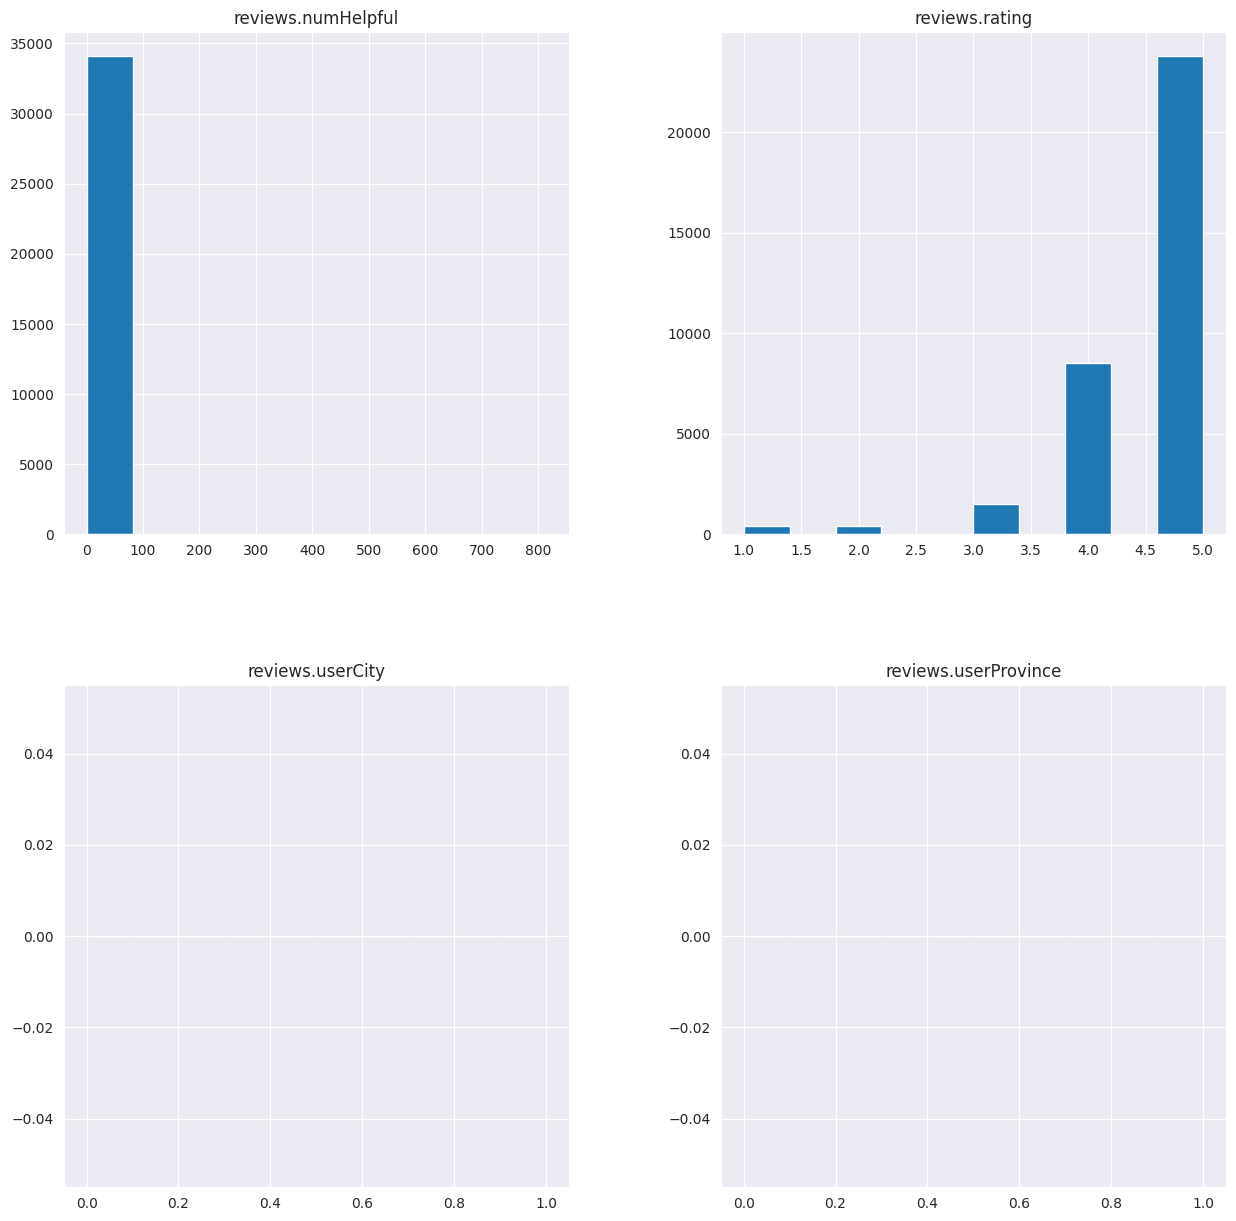

In [ ]:
data.hist(figsize=(15,15))
plt.show()

In [ ]:
#train and test
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
# now removing all null values from review.rating
data_after=data.dropna(subset=['reviews.rating'])
print("After {}".format(len(data_after)))
data_after['reviews.rating']=data_after['reviews.rating'].astype(int)


Before 34660
After 34627


In [ ]:
split=StratifiedShuffleSplit(n_splits=5,test_size=0.2)
for train_index,test_index in split.split(data_after,data_after["reviews.rating"]):
    strat_train=data_after.reindex(train_index)
    strat_test=data_after.reindex(test_index)
strat_train.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
10308,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-01-08T00:00:00.000Z,2017-05-21T01:58:56Z,"2017-04-30T00:14:00.000Z,2017-06-07T08:13:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,It was a good tablet for the very inexpensive ...,Good,NaN,NaN,gen0
11537,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-07-15T00:00:00.000Z,2017-05-21T02:56:41Z,"2017-04-30T00:20:00.000Z,2017-06-07T08:17:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,Lightning fast no but still a great and inexpe...,Great for it's original purpose,NaN,NaN,Scott
26072,AVpfl8cLLJeJML43AE3S,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-03-01T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/5588528/review...,"I can make a grocery list, request my favorite...",Love the Amazon Echo,NaN,NaN,bubbles
27260,AVpfl8cLLJeJML43AE3S,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-01-27T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,The Echo has great sound quality and is amazin...,amazing uses,NaN,NaN,Sylviah
1272,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-02T00:00:00.000Z,2017-05-21T05:59:35Z,"2017-04-30T00:43:00.000Z,2017-06-07T09:03:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"Great tablet, especially for the price. I boug...",Great tablet,NaN,NaN,Buyer1900


In [ ]:
len(strat_train)

27701

In [ ]:
len(strat_test)

6926

In [ ]:
strat_train["reviews.rating"].value_counts()/len(strat_train)


,count
reviews.rating,
5.0,0.687593
4.0,0.245370
3.0,0.042562
1.0,0.011769
2.0,0.011696


In [ ]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

,count
reviews.rating,
5.0,0.680191
4.0,0.251372
3.0,0.045914
2.0,0.011118
1.0,0.010684


In [ ]:
#exploratory data exploration (training set)

reviews=strat_train.copy()
reviews.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
10308,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-01-08T00:00:00.000Z,2017-05-21T01:58:56Z,"2017-04-30T00:14:00.000Z,2017-06-07T08:13:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,It was a good tablet for the very inexpensive ...,Good,NaN,NaN,gen0
11537,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-07-15T00:00:00.000Z,2017-05-21T02:56:41Z,"2017-04-30T00:20:00.000Z,2017-06-07T08:17:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,Lightning fast no but still a great and inexpe...,Great for it's original purpose,NaN,NaN,Scott


In [ ]:
reviews.groupby('asins')['name'].unique()


,name
asins,
B005PB2T0S,"[Amazon Kindle Lighted Leather Cover,,,\r\nKin..."
B005PB2T2Q,"[Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1..."
B00DU15MU4,[Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOY8XWQ,[Amazon Fire Hd 8 8in Tablet 16gb Black B018sz...
B00IOYAM4I,[Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
"B00L9EPT8O,B01E6AO69U","[Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,, Echo ..."
B00LO29KXQ,"[Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include..."
B00LW9XOJM,[nan]
B00OQVZDJM,[Amazon Kindle Paperwhite - eBook reader - 4 G...


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27701 entries, 10308 to 17478
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27673 non-null  object 
 1   name                  22277 non-null  object 
 2   asins                 27671 non-null  object 
 3   brand                 27673 non-null  object 
 4   categories            27673 non-null  object 
 5   keys                  27673 non-null  object 
 6   manufacturer          27673 non-null  object 
 7   reviews.date          27653 non-null  object 
 8   reviews.dateAdded     19244 non-null  object 
 9   reviews.dateSeen      27673 non-null  object 
 10  reviews.doRecommend   27241 non-null  object 
 11  reviews.numHelpful    27294 non-null  float64
 12  reviews.rating        27673 non-null  float64
 13  reviews.sourceURLs    27673 non-null  object 
 14  reviews.text          27672 non-null  object 
 15  reviews.title       

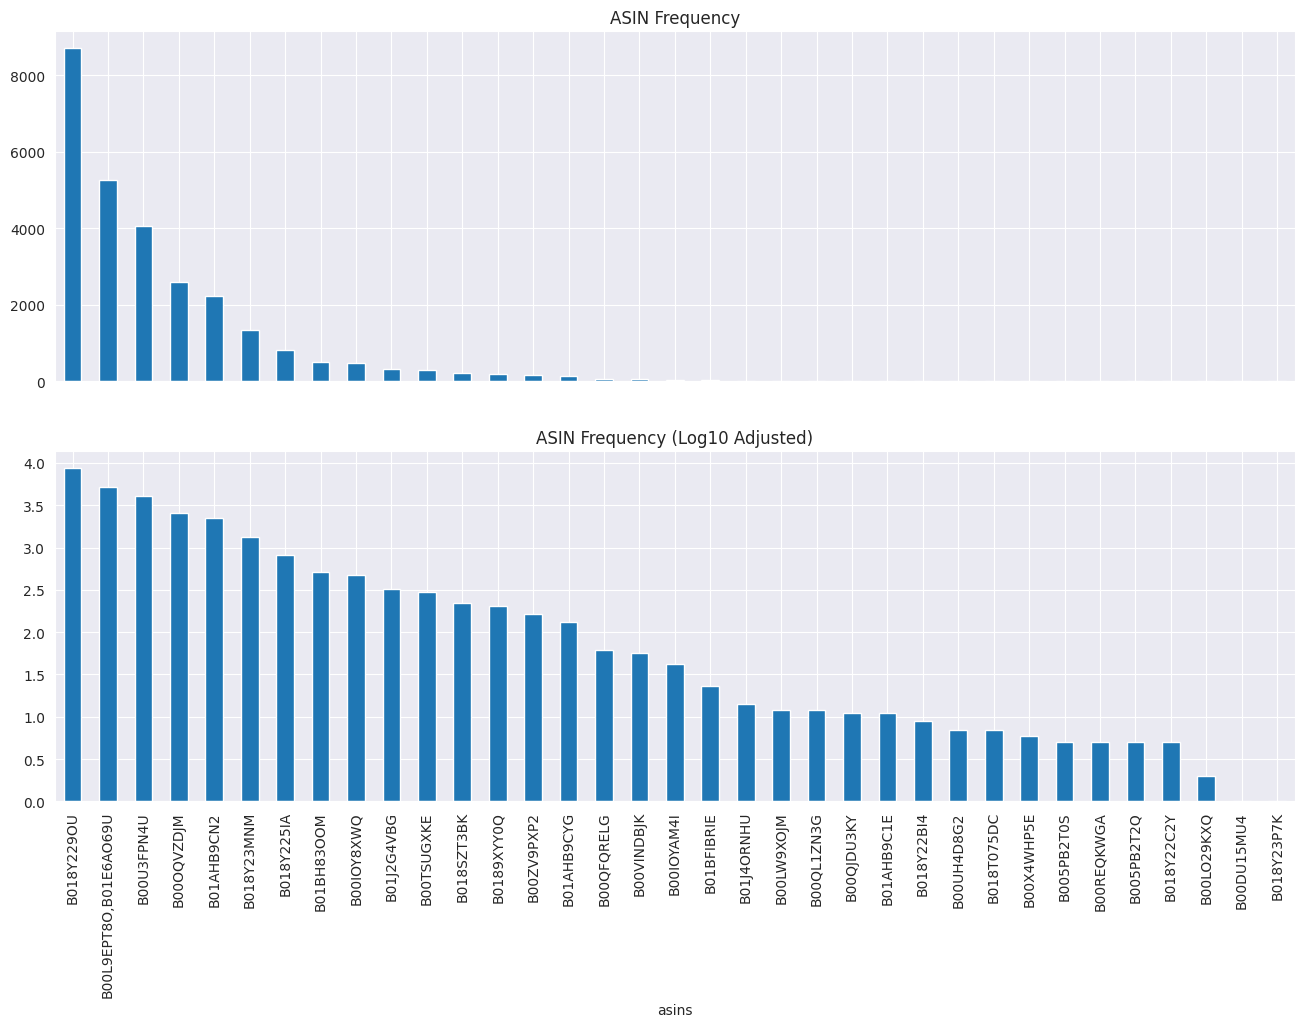

In [ ]:
fig = plt.figure(figsize=(16,10))
# we use subplot when we have to see interrelationship btw two graphs
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
# The ax (or Axes object) is the area of the figure where your data appears
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2,
                                               title="ASIN Frequency (Log10 Adjusted)")
# np.log10 normalises our data to visualise the graph and difference much better
plt.show()

In [ ]:
reviews['reviews.rating'].mean()


4.586925884436093

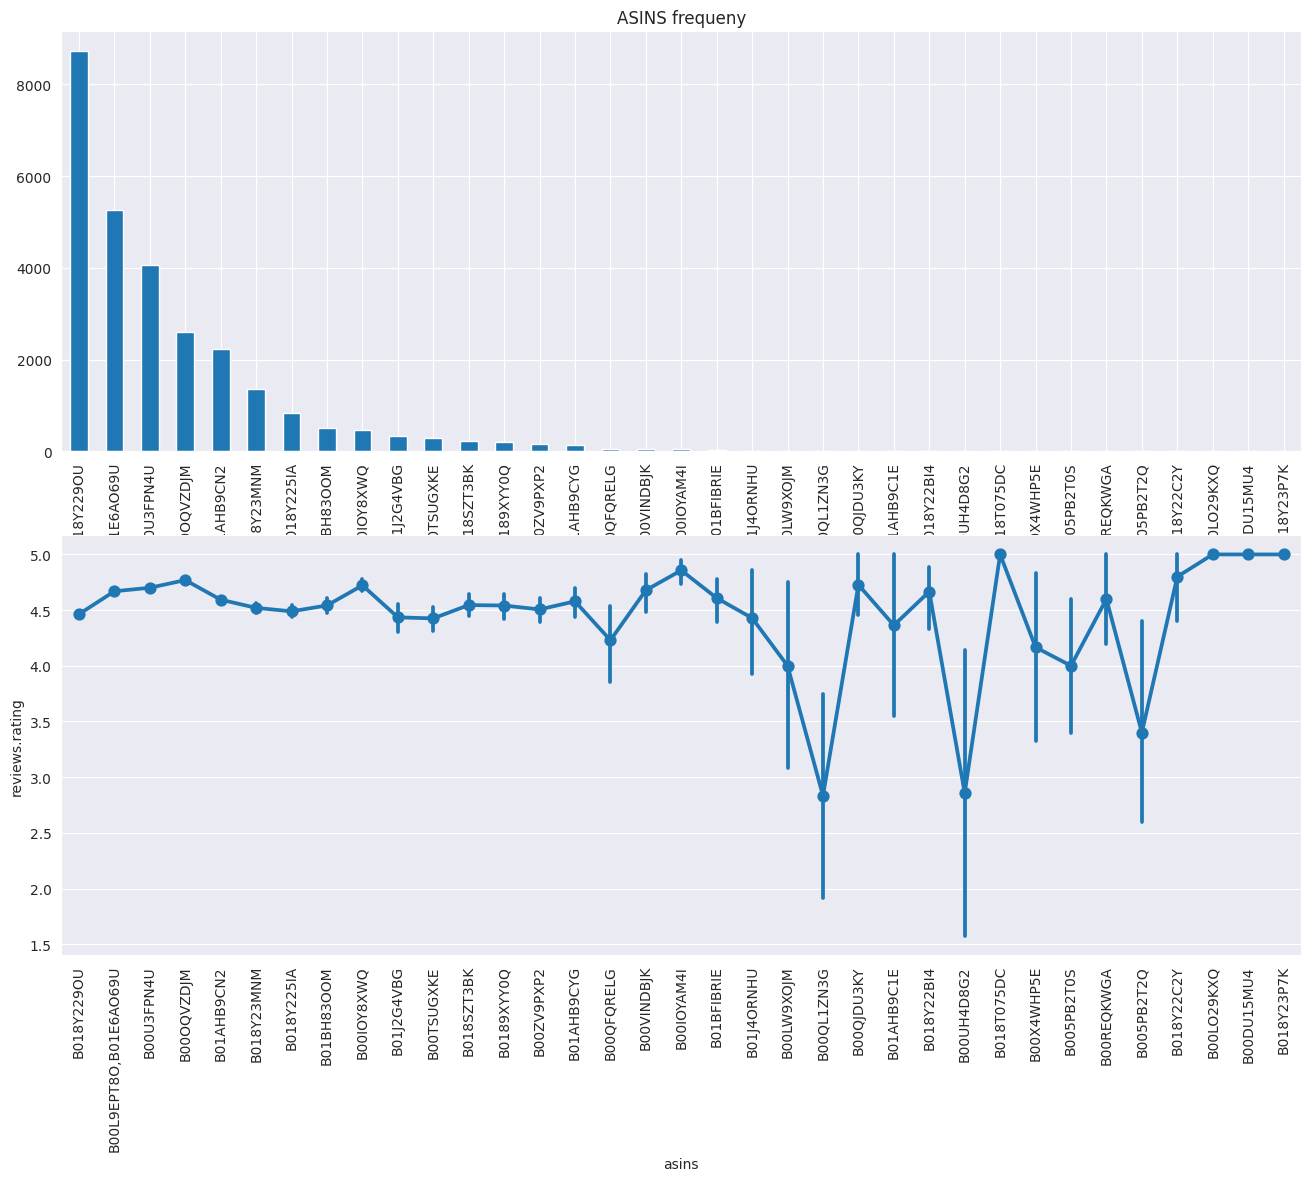

In [ ]:
asins_count=reviews['asins'].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews['asins'].value_counts().plot(kind="bar",title="ASINS frequeny")
plt.subplot(2,1,2)
sns.pointplot(x="asins",y="reviews.rating",order=asins_count,data=reviews)
plt.xticks(rotation=90)
plt.show()

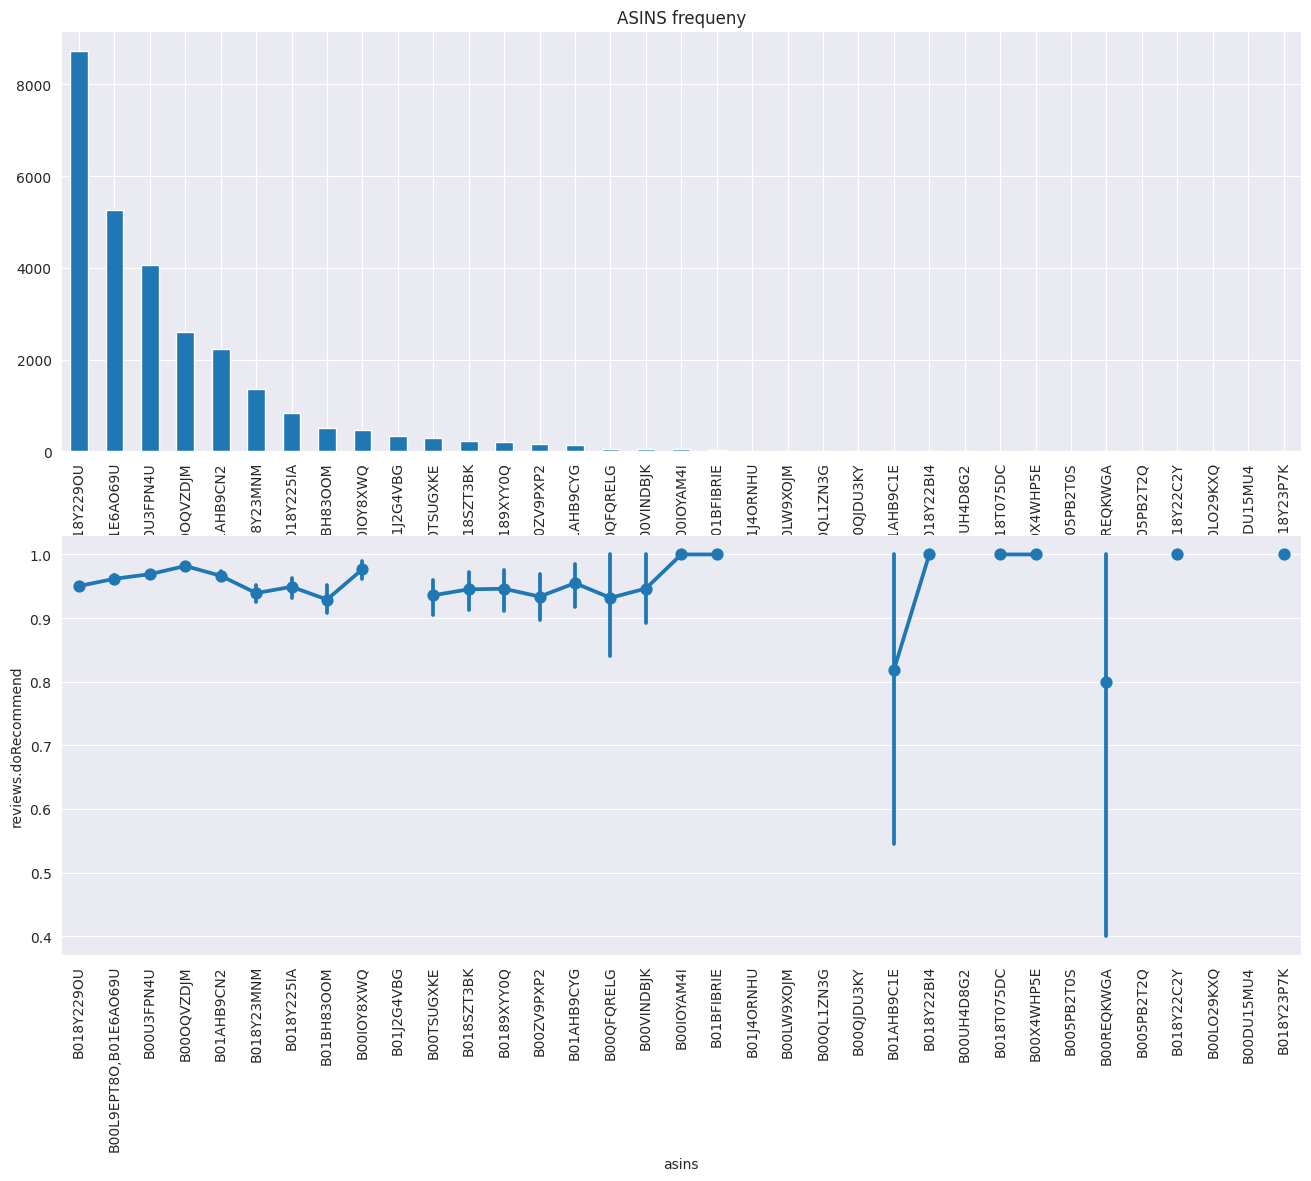

In [ ]:
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews['asins'].value_counts().plot(kind="bar",title="ASINS frequeny")
plt.subplot(2,1,2)
sns.pointplot(x="asins",y="reviews.doRecommend",order=asins_count,data=reviews)
plt.xticks(rotation=90)
plt.show()


In [ ]:
counts=reviews['asins'].value_counts().to_frame()
avg_rating=reviews.groupby("asins")['reviews.rating'].mean().to_frame()
avg_rating

,reviews.rating
asins,
B005PB2T0S,4.000000
B005PB2T2Q,3.400000
B00DU15MU4,5.000000
B00IOY8XWQ,4.722458
B00IOYAM4I,4.857143
"B00L9EPT8O,B01E6AO69U",4.669453
B00LO29KXQ,5.000000
B00LW9XOJM,4.000000
B00OQVZDJM,4.769587


In [ ]:
table=avg_rating.join(counts)
table

,reviews.rating,count
asins,,
B005PB2T0S,4.000000,5
B005PB2T2Q,3.400000,5
B00DU15MU4,5.000000,1
B00IOY8XWQ,4.722458,472
B00IOYAM4I,4.857143,42
"B00L9EPT8O,B01E6AO69U",4.669453,5264
B00LO29KXQ,5.000000,2
B00LW9XOJM,4.000000,12
B00OQVZDJM,4.769587,2591


In [ ]:
counts=reviews['asins'].value_counts().to_frame()
avg_rating=reviews.groupby("asins")['reviews.rating'].mean().to_frame()
avg_rating

,reviews.rating
asins,
B005PB2T0S,4.000000
B005PB2T2Q,3.400000
B00DU15MU4,5.000000
B00IOY8XWQ,4.722458
B00IOYAM4I,4.857143
"B00L9EPT8O,B01E6AO69U",4.669453
B00LO29KXQ,5.000000
B00LW9XOJM,4.000000
B00OQVZDJM,4.769587


In [ ]:
table=avg_rating.join(counts)
table

,reviews.rating,count
asins,,
B005PB2T0S,4.000000,5
B005PB2T2Q,3.400000,5
B00DU15MU4,5.000000,1
B00IOY8XWQ,4.722458,472
B00IOYAM4I,4.857143,42
"B00L9EPT8O,B01E6AO69U",4.669453,5264
B00LO29KXQ,5.000000,2
B00LW9XOJM,4.000000,12
B00OQVZDJM,4.769587,2591


,reviews.rating,count
reviews.rating,1.000000,0.120143
count,0.120143,1.000000


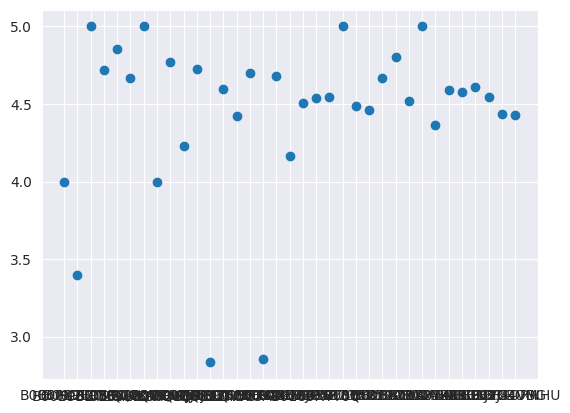

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias "plt"

plt.scatter(table.index, table["reviews.rating"]) # Use the DataFrame index for the x-axis and the "reviews.rating" column for the y-axis.
table.corr()

In [ ]:
def sentiments(rating):
    if(rating==5)or(rating==4):
        return "Positive"
    elif rating==3:
        return "Neutral"
    elif(rating==2)or(rating==1):
        return "Negative"

In [ ]:
strat_train['Sentiments']=strat_train['reviews.rating'].apply(sentiments)
strat_test['Sentiments']=strat_test['reviews.rating'].apply(sentiments)
# strat_train.head()
strat_train["Sentiments"][:20]

,Sentiments
10308,Positive
11537,Positive
26072,Positive
27260,Positive
1272,Positive
27480,Neutral
5571,Positive
10563,Positive
22081,Positive
2645,Positive


In [ ]:
x_train=strat_train['reviews.text']
x_train_targetsentiment=strat_train['Sentiments']
x_test=strat_test['reviews.text']
x_test_targetsentiment=strat_test['Sentiments']
print(len(x_train),len(x_test))

27701 6926


In [ ]:
# tokenisation: which breaks sentences into words
# stopwords: filtering unwanted words like the ,are etc.
# filling na with space
x_train=x_train.fillna(' ')
x_test=x_test.fillna(' ')
x_train_targetsentiment=x_train_targetsentiment.fillna(' ')
x_test_targetsentiment=x_test_targetsentiment.fillna(' ')
# Text preprocessing and occurence counting using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
x_train_counts=count_vect.fit_transform(x_train)
x_train_counts.shape

(27701, 12497)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfid_transformer=TfidfTransformer(use_idf=False)
x_train_tfid=tfid_transformer.fit_transform(x_train_counts)
x_train_tfid.shape

(27701, 12497)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe=Pipeline([('vect',CountVectorizer()),
                               ("tfidf",TfidfTransformer()),
                               ("clf_nominalNB",MultinomialNB())])
clf_multiNB_pipe.fit(x_train,x_train_targetsentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [ ]:
predict_multiNB=clf_multiNB_pipe.predict(x_test)
predict_multiNB

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(x_test_targetsentiment,predict_multiNB)))

Accuracy: 0.931273462315911


In [ ]:
x_test

,reviews.text
11981,"This is a great deal, especially when on sale ..."
15578,Returned it. it was a poor reader and clearly ...
11365,I use my Kindle Fire mostly for reading Kindle...
23758,Expensive speaker. Voice recognition does not ...
25670,Great gift for a son who has everything and lo...
...,...
10646,Best tab for kids with very low budget and as ...
27794,"It is very good, but very limited to the numbe..."
11414,This tablet is very small and efficient. My da...
16918,My kids really seem to like this. I really lik...


In [ ]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()),
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(x_train, x_train_targetsentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(x_test)
print('Accuracy: {}'. format(accuracy_score(x_test_targetsentiment,
                             predictedLinearSVC)))

Accuracy: 0.9357493502743286


In [ ]:
new_text=["the tablet is good , really liked it",
         "the tablet is ok,it's working",
         "The tablet is not good, does not work waste"]
clf_linearSVC_pipe.predict(new_text)

array(['Positive', 'Neutral', 'Negative'], dtype=object)

# New Section